### Import Statements

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats

In [3]:
pre_clean_winemag = pd.read_csv('Data/winemag-data-130k-v2.csv')

In [4]:
pre_clean_winemag_nodup = pre_clean_winemag.duplicated(subset='title', keep='first')

In [5]:
pre_clean_winemag[pre_clean_winemag_nodup].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11131 entries, 959 to 129913
Data columns (total 14 columns):
Unnamed: 0               11131 non-null int64
country                  11127 non-null object
description              11131 non-null object
designation              7955 non-null object
points                   11131 non-null int64
price                    10394 non-null float64
province                 11127 non-null object
region_1                 9378 non-null object
region_2                 3943 non-null object
taster_name              9620 non-null object
taster_twitter_handle    9171 non-null object
title                    11131 non-null object
variety                  11131 non-null object
winery                   11131 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB


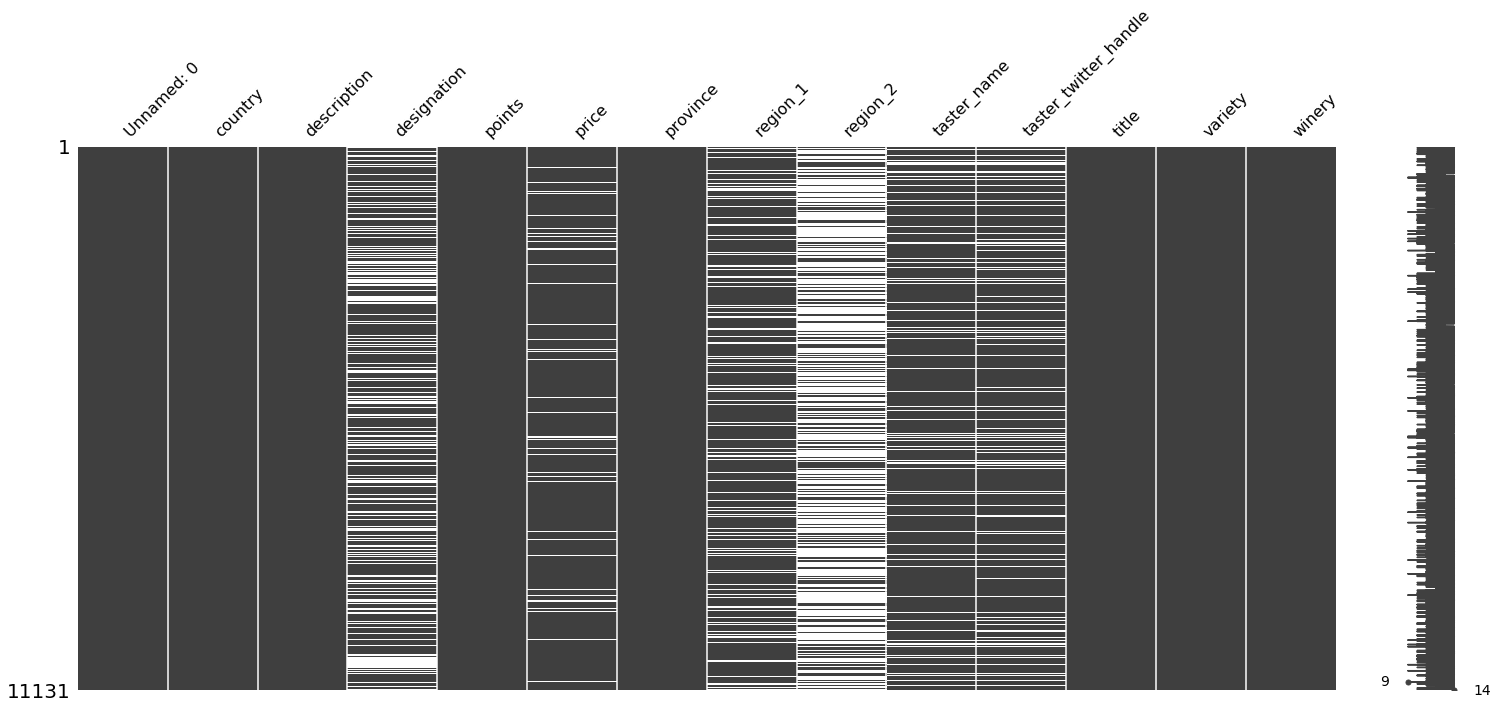

In [6]:
missingno.matrix(pre_clean_winemag[pre_clean_winemag_nodup])

In [7]:
pre_clean_winemag_nodup = pre_clean_winemag[pre_clean_winemag_nodup].drop(['Unnamed: 0', 'designation', 'region_1', 'region_2'], axis=1)

In [8]:
pre_clean_winemag_nodup = pre_clean_winemag_nodup.dropna()

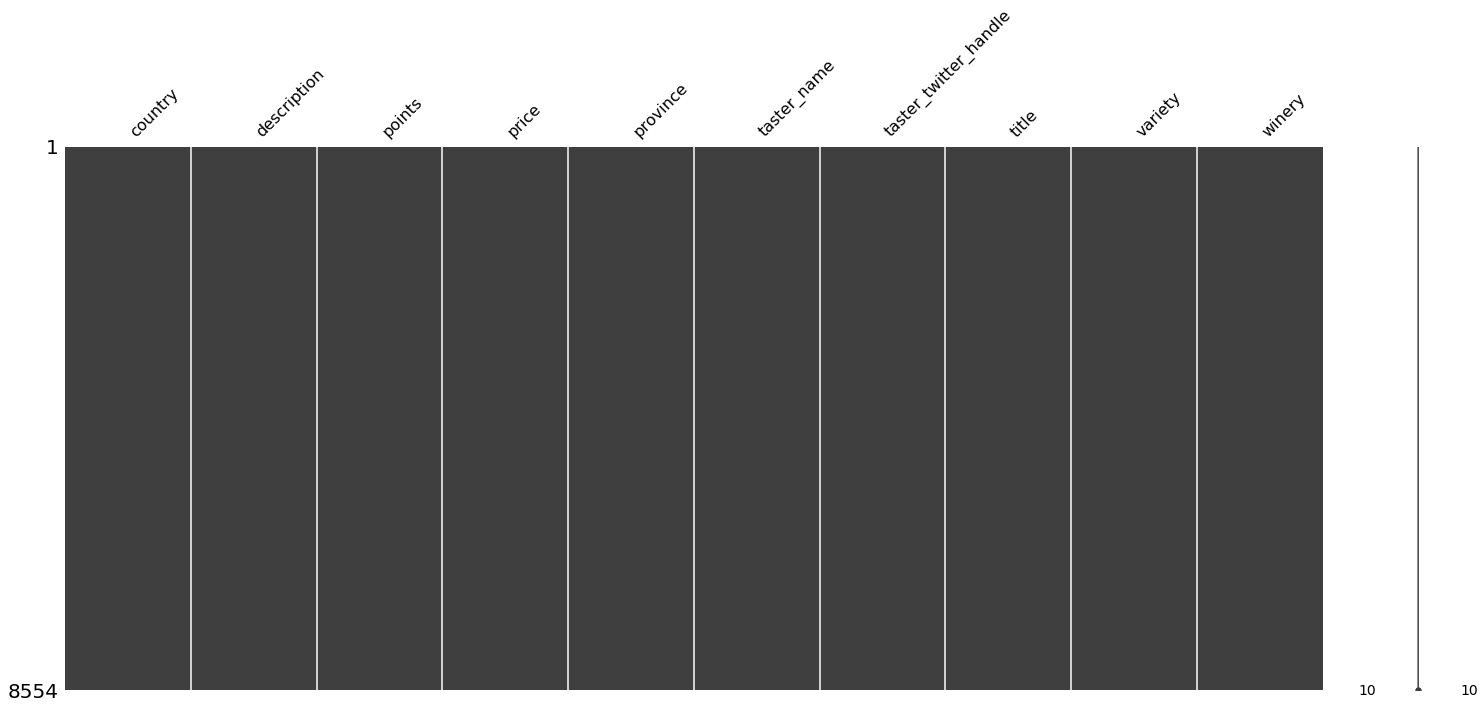

In [9]:
missingno.matrix(pre_clean_winemag_nodup)

In [10]:
clean_winemag = pre_clean_winemag_nodup[pre_clean_winemag_nodup['price'] >= 100 ].index
pre_clean_winemag_nodup.drop(clean_winemag, inplace=True)

In [11]:
pre_clean_winemag_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8380 entries, 959 to 129913
Data columns (total 10 columns):
country                  8380 non-null object
description              8380 non-null object
points                   8380 non-null int64
price                    8380 non-null float64
province                 8380 non-null object
taster_name              8380 non-null object
taster_twitter_handle    8380 non-null object
title                    8380 non-null object
variety                  8380 non-null object
winery                   8380 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 720.2+ KB


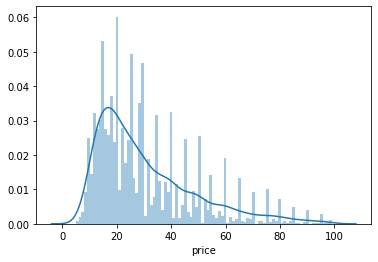

In [12]:
sns.distplot(pre_clean_winemag_nodup['price'], bins=90)

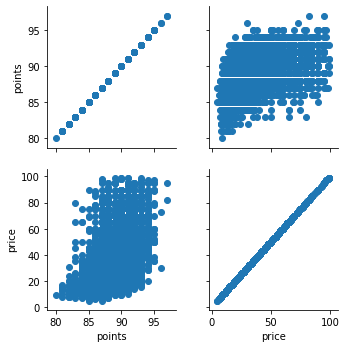

In [13]:
g = sns.PairGrid(pre_clean_winemag_nodup)
g.map(plt.scatter);

In [14]:
winemag_data = pre_clean_winemag_nodup

In [15]:
winemag_data.groupby("country")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,251.0,21.741036,12.458919,8.0,13.00,18.0,25.00,75.0
Australia,128.0,30.875000,21.598338,8.0,16.00,20.0,37.50,95.0
Austria,272.0,25.132353,12.504942,11.0,17.00,22.0,29.25,80.0
Brazil,3.0,13.000000,1.732051,12.0,12.00,12.0,13.50,15.0
Bulgaria,8.0,12.125000,2.642374,9.0,10.75,11.0,14.00,17.0
Canada,29.0,35.413793,19.223344,15.0,23.00,32.0,38.00,95.0
Chile,290.0,18.706897,11.590786,5.0,12.00,15.0,20.00,85.0
Croatia,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
Cyprus,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0


In [16]:
winemag_data.head()

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
959,France,Partially from Grand Cru vineyards in the Mont...,87,40.0,Champagne,Roger Voss,@vossroger,Jacquart NV Brut Mosaïque (Champagne),Champagne Blend,Jacquart
2360,France,"A smooth and rounded wine, its ripe plum and b...",88,35.0,Burgundy,Roger Voss,@vossroger,Domaines Devillard 2011 Château de Chamirey (...,Pinot Noir,Domaines Devillard
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2410,Chile,Lightly herbal strawberry and raspberry aromas...,85,13.0,Maipo Valley,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2413,France,"Fruity and lightly herbaceous, this has fine t...",85,15.0,Bordeaux,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours


In [17]:
us_wine = winemag_data.loc[winemag_data['country'] == 'US']

In [113]:
french_wine = winemag_data.loc[winemag_data['country'] == 'France']

In [19]:
# ex_us_fr = winemag_data.loc[(winemag_data['country'] != 'US') & (winemag_data['country'] != 'France')]

# df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [20]:
# ex_us_fr.country.value_counts()

In [21]:
us_mean = us_wine.points.mean()

In [22]:
us_std = us_wine.points.std()

In [23]:
french_mean = french_wine.points.mean()

In [24]:
french_std = french_wine.points.std()

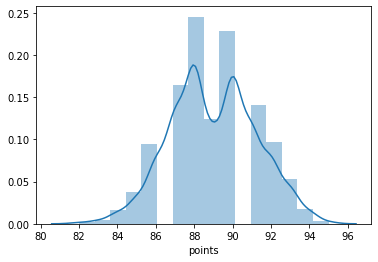

In [25]:
sns.distplot(us_wine['points'], bins=16)

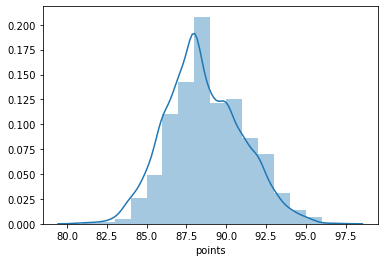

In [26]:
sns.distplot(french_wine['points'], bins=16)

In [27]:
pop_mean = winemag_data.points.mean()

In [28]:
pop_std = winemag_data.points.std()

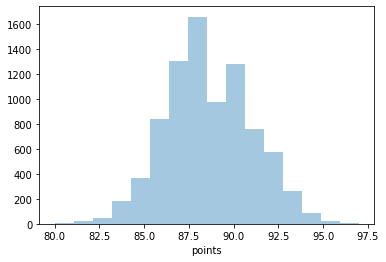

In [31]:
sns.distplot(winemag_data['points'], bins=16, kde=False)

In [32]:
pop_mean = pop_mean
sample_data = us_wine['points']

In [33]:
# ttest_1samp(sample_data, pop_mean)
stats.ttest_ind(us_wine['points'], french_wine['points'], equal_var = False)

Ttest_indResult(statistic=6.415445259375518, pvalue=1.5736448227515e-10)

In [34]:
stats.shapiro(us_wine['points'])

(0.9775567054748535, 1.3038238515427114e-21)

In [35]:
stats.shapiro(french_wine['points'])

(0.9787120819091797, 2.9802211033498236e-16)

In [36]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")
        
welch_dof(us_wine['points'], french_wine['points'])

Welch-Satterthwaite Degrees of Freedom = 3866.9575


In [37]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")

welch_ttest(us_wine['points'], french_wine['points'])



 Welch's t-test= 6.4154 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 3866.9575


In [38]:
p = 1 - stats.t.cdf(, us_wine['points'])

SyntaxError: invalid syntax (<ipython-input-38-043cbdf91c22>, line 1)

In [45]:
stats.t.cdf(us_wine.points, df =24)

array([1., 1., 1., ..., 1., 1., 1.])

HYPOTHESIS 2:
A wine’s rating/score will be higher if it is priced above $50

In [48]:
cheap_wine = winemag_data.loc[winemag_data['price'] <= 50.0]

In [49]:
pricey_wine = winemag_data.loc[winemag_data['price'] > 50.0]

In [51]:
cheap_rating_mean = cheap_wine.points.mean()
cheap_rating_mean

88.31059566291518

In [61]:
cheap_rating_std = cheap_wine.points.std()
cheap_rating_std

2.1737222049769396

In [62]:
pricey_rating_mean = pricey_wine.points.mean()
pricey_rating_mean

90.36014625228519

In [63]:
pricey_rating_std = pricey_wine.points.std()
pricey_rating_std

2.1786837176672043

In [55]:
cheap_wine.shape

(7286, 10)

In [56]:
pricey_wine.shape

(1094, 10)

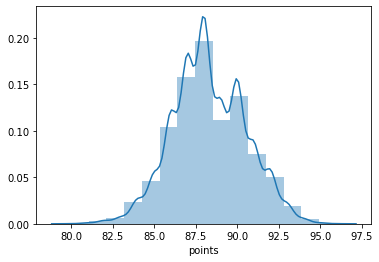

In [59]:
sns.distplot(cheap_wine['points'], bins=15)

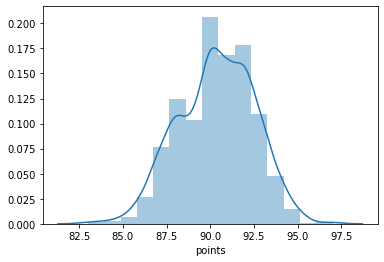

In [60]:
sns.distplot(pricey_wine['points'], bins=15)

In [77]:
welch_dof(cheap_wine['points'], pricey_wine['points'])

Welch-Satterthwaite Degrees of Freedom = 1439.3307


In [78]:
welch_ttest(cheap_wine['points'], pricey_wine['points'])


 Welch's t-test= -29.0218 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 1439.3307


In [96]:
below_twentyfive = winemag_data.loc[winemag_data['price'] < 25.0]
below_twentyfive.describe()

,points,price
count,3959.000000,3959.000000
mean,87.521596,16.620864
std,1.939972,4.196774
min,80.000000,5.000000
25%,86.000000,13.000000
50%,87.000000,17.000000
75%,89.000000,20.000000
max,94.000000,24.000000


In [97]:
twentyfive_to_fifty = winemag_data.loc[(winemag_data['price'] >= 25.0) & (winemag_data['price'] < 50.0)]
twentyfive_to_fifty.describe()

,points,price
count,3103.000000,3103.000000
mean,89.177248,34.077989
std,2.039939,6.981673
min,82.000000,25.000000
25%,88.000000,28.000000
50%,89.000000,33.000000
75%,91.000000,40.000000
max,96.000000,49.000000


In [98]:
fifty_to_seventyfive = winemag_data.loc[(winemag_data['price'] >= 50.0) & (winemag_data['price'] < 75.0)]
fifty_to_seventyfive.describe()

,points,price
count,994.000000,994.000000
mean,90.218310,58.200201
std,2.108733,6.671788
min,83.000000,50.000000
25%,89.000000,52.000000
50%,90.000000,58.000000
75%,92.000000,65.000000
max,96.000000,74.000000


In [99]:
above_seventyfive = winemag_data.loc[winemag_data['price'] > 75.0]
above_seventyfive.describe()

,points,price
count,237.000000,237.000000
mean,90.827004,85.582278
std,2.312372,6.226531
min,83.000000,76.000000
25%,89.000000,80.000000
50%,91.000000,85.000000
75%,92.000000,90.000000
max,97.000000,99.000000


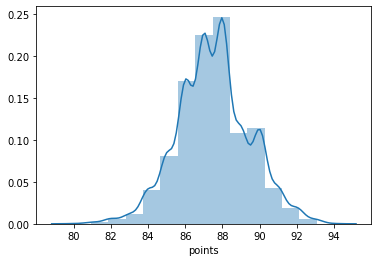

In [87]:
sns.distplot(below_twentyfive['points'], bins=15)

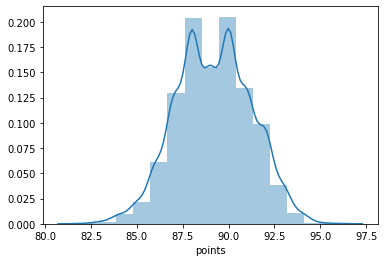

In [88]:
sns.distplot(twentyfive_to_fifty['points'], bins=15)

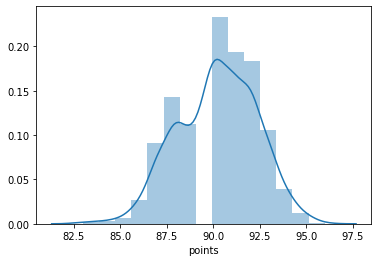

In [90]:
sns.distplot(fifty_to_seventyfive['points'], bins=15)

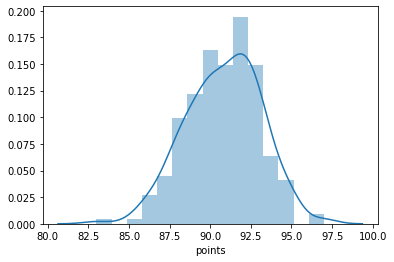

In [91]:
sns.distplot(above_seventyfive['points'], bins=15)

In [102]:
stats.ttest_ind(below_twentyfive['points'], twentyfive_to_fifty['points'], equal_var = False)

Ttest_indResult(statistic=-34.585249421571895, pvalue=9.628523955050413e-241)

In [103]:
welch_dof(below_twentyfive['points'], twentyfive_to_fifty['points'])

Welch-Satterthwaite Degrees of Freedom = 6499.0387


In [104]:
welch_ttest(below_twentyfive['points'], twentyfive_to_fifty['points'])


 Welch's t-test= -34.5852 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 6499.0387


In [106]:
stats.ttest_ind(fifty_to_seventyfive['points'], above_seventyfive['points'], equal_var = False)

Ttest_indResult(statistic=-3.701993934125221, pvalue=0.0002499524258450628)

In [109]:
welch_dof(fifty_to_seventyfive['points'], above_seventyfive['points'])

Welch-Satterthwaite Degrees of Freedom = 335.7321


In [110]:
welch_ttest(fifty_to_seventyfive['points'], above_seventyfive['points'])


 Welch's t-test= -3.7020 
 p-value = 0.0002 
 Welch-Satterthwaite Degrees of Freedom = 335.7321


In [115]:
french_wine.groupby("points")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
81,2.0,15.500000,2.121320,14.0,14.75,15.5,16.25,17.0
82,3.0,15.000000,2.645751,12.0,14.00,16.0,16.50,17.0
83,9.0,26.555556,24.285341,10.0,11.00,15.0,35.00,80.0
84,50.0,17.560000,7.180359,10.0,13.00,15.0,20.00,40.0
85,93.0,20.709677,13.187264,6.0,13.00,16.0,24.00,75.0
86,211.0,20.355450,10.435822,9.0,13.50,17.0,23.50,60.0
87,271.0,26.055351,15.143043,7.0,15.00,21.0,31.00,95.0
88,397.0,27.350126,15.380390,10.0,16.00,23.0,34.00,95.0
89,232.0,33.866379,18.044061,10.0,20.00,29.5,45.00,96.0


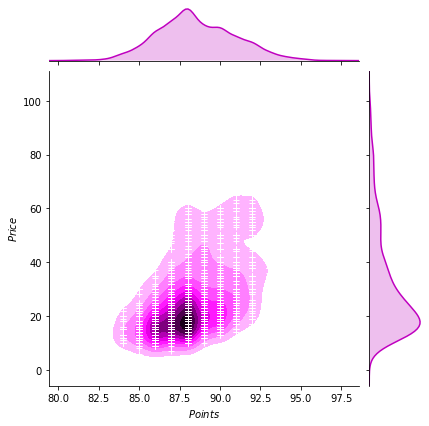

In [124]:
g = sns.jointplot(x="points", y="price", data=french_wine, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Points$", "$Price$");

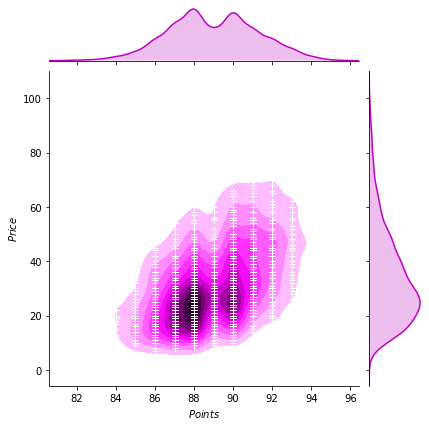

In [121]:
g = sns.jointplot(x="points", y="price", data=us_wine, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Points$", "$Price$");

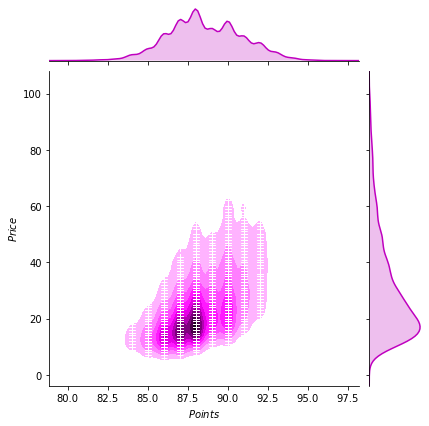

In [125]:
g = sns.jointplot(x="points", y="price", data=winemag_data, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Points$", "$Price$");

In [127]:
spanish_wine = winemag_data.loc[winemag_data['country'] == 'Spain']


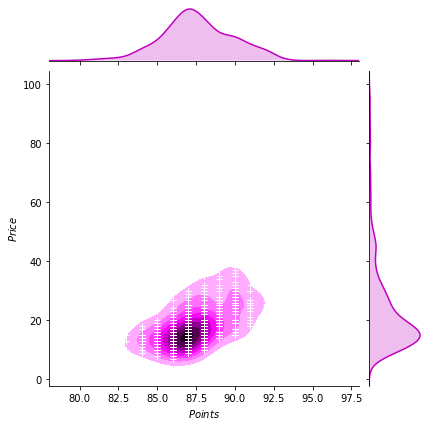

In [128]:
g = sns.jointplot(x="points", y="price", data=spanish_wine, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Points$", "$Price$");

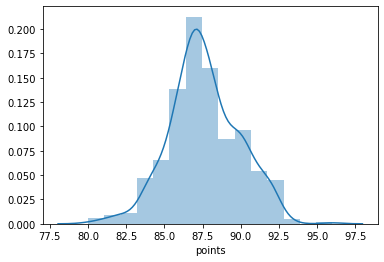

In [129]:
sns.distplot(spanish_wine['points'], bins=15)

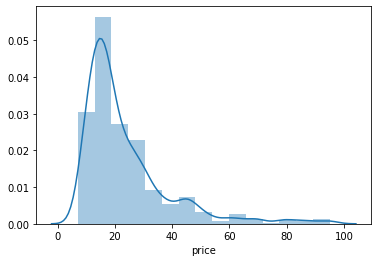

In [130]:
sns.distplot(spanish_wine['price'], bins=15)

Attempting to split data into quintiles
